In [1]:
from ITC_ophyd import MercuryITCDevice

In [2]:
LTDLC = MercuryITCDevice(prefix="...",name="ITCD", host="129.129.131.136")
# LTDLC.stage()
# print(LTDLC.read())

# print(LTDLC.get())
# print(LTDLC.describe())


connecting to 129.129.131.136


In [3]:
print(LTDLC.read())

OrderedDict([('LTDLC_scan_end', {'value': 14.0, 'timestamp': 1685975129.2439547}), ('LTDLC_scan_start', {'value': 12.88000000000001, 'timestamp': 1685975129.2449527}), ('LTDLC_scan_offset', {'value': 13.440000000000005, 'timestamp': 1685975129.2449527}), ('LTDLC_scan_frequency', {'value': 14.000045970741974, 'timestamp': 1685975129.2449527}), ('LTDLC_ctl_wavelength_act', {'value': 1609.9995869397872, 'timestamp': 1685975129.2459652})])


In [4]:
LTDLC.summary()

data keys (* hints)
-------------------
*LTDLC_ctl_wavelength_act
*LTDLC_scan_end
*LTDLC_scan_frequency
*LTDLC_scan_offset
*LTDLC_scan_start

read attrs
----------
scan_end             LaserMainScanEnd    ('LTDLC_scan_end')
scan_start           LaserMainScanStart  ('LTDLC_scan_start')
scan_offset          LaserMainScanOffset ('LTDLC_scan_offset')
scan_frequency       LaserMainScanFrequency('LTDLC_scan_frequency')
ctl_wavelength_act   LaserMainCtlWavelengthAct('LTDLC_ctl_wavelength_act')

config keys
-----------

configuration attrs
-------------------

unused attrs
------------
low_limit_wavelength Signal              ('LTDLC_low_limit_wavelength')



In [5]:
from bluesky import RunEngine
from bluesky.plans import count
from bluesky.callbacks.best_effort import BestEffortCallback
RE = RunEngine({})
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)
from databroker import Broker
import databroker
# db = Broker.named('temp')

# Insert all metadata/data captured into db.
# RE.subscribe(db.insert)
catalog = databroker.catalog['CATALOG_PSI_IR']
RE.subscribe(catalog.v1.insert)


c:\Users\DanielM\anaconda3\envs\psi-bluesky\lib\site-packages\pims\image_reader.py:26: RuntimeWarning: PIMS image_reader.py could not find scikit-image. Falling back to matplotlib's imread(), which uses floats instead of integers. This may break your scripts. 
(To ignore this warning, include the line "warnings.simplefilter("ignore", RuntimeWarning)" in your script.)
  warnings.warn(RuntimeWarning(ski_preferred))


1



Transient Scan ID: 1     Time: 2023-06-05 16:25:44
Persistent Unique Scan ID: 'e0bf83ae-400f-4381-aeee-7759136e5a39'
New stream: 'primary'
+-----------+------------+----------------+------------------+-------------------+----------------------+--------------------------+
|   seq_num |       time | LTDLC_scan_end | LTDLC_scan_start | LTDLC_scan_offset | LTDLC_scan_frequency | LTDLC_ctl_wavelength_act |
+-----------+------------+----------------+------------------+-------------------+----------------------+--------------------------+
|         1 | 16:25:46.4 |         14.000 |           12.880 |            13.440 |               14.000 |                 1610.000 |
|         2 | 16:25:50.2 |         14.000 |           12.880 |            13.440 |               14.000 |                 1610.000 |
|         3 | 16:25:53.1 |         14.000 |           12.880 |            13.440 |               14.000 |                 1610.000 |
|         4 | 16:25:55.8 |         14.000 |           12.880 

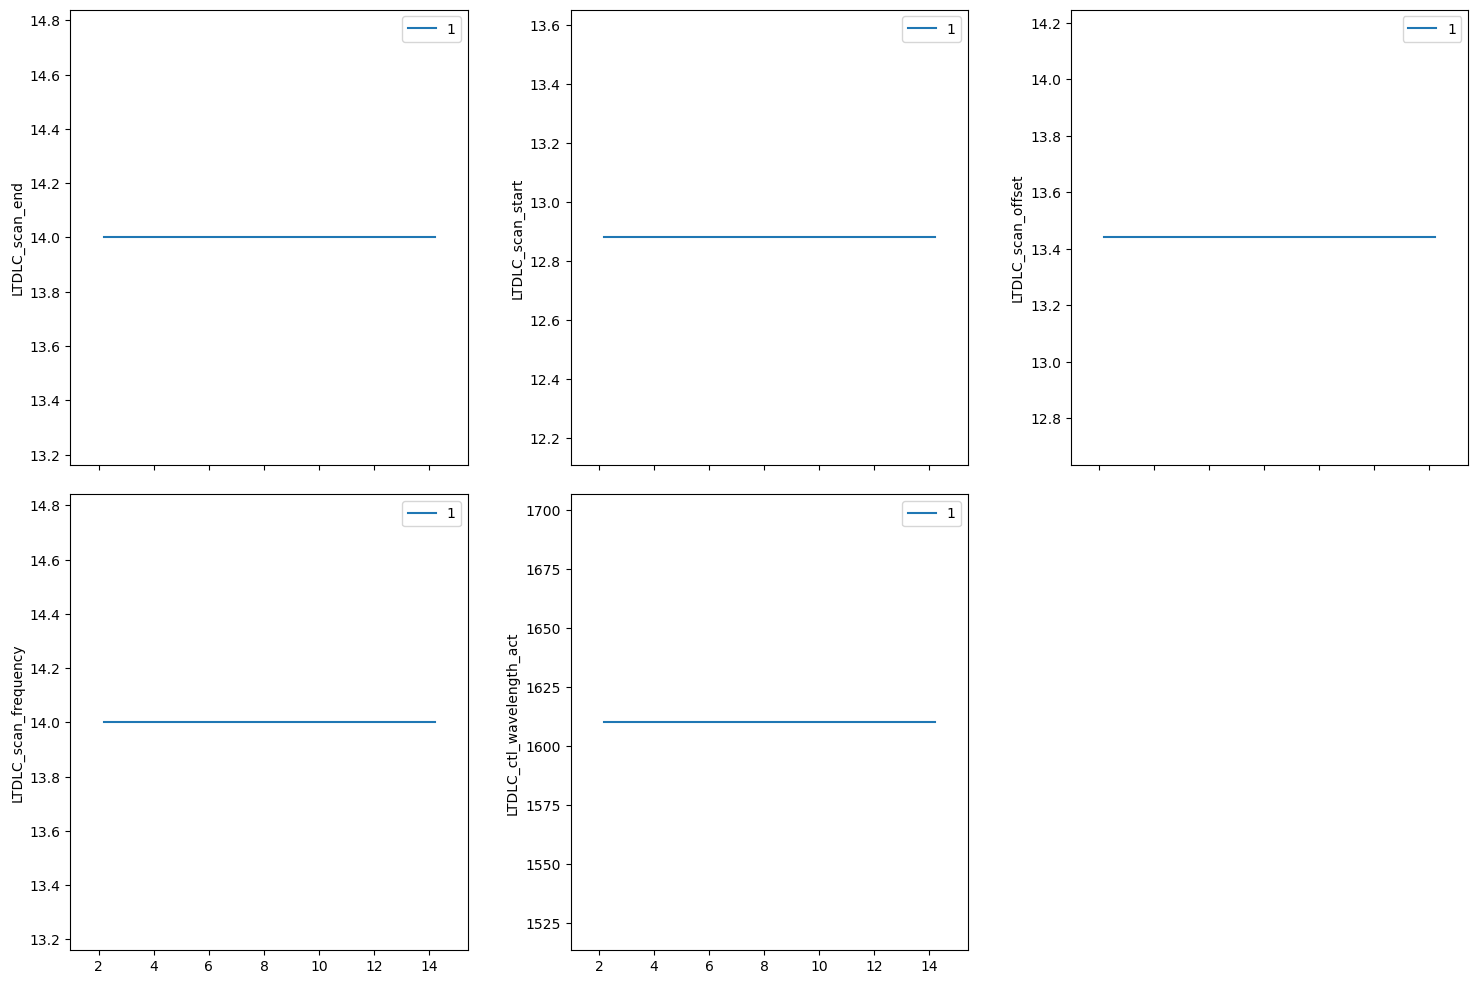

In [7]:
# from functools import partial
# laser_count = partial(count, [LTDLC])
# countDLC, = RE(laser_count(num=5,delay=1))
# from bluesky.callbacks.mpl_plotting import LivePlot

countDLC, = RE(count([LTDLC],num=5,delay=1))
# countDLC, = RE(count([LTDLC],num=5,delay=1, LivePlot('LTDLC_scan_end', 'LTDLC_scan_start')))

In [8]:
header = catalog[countDLC]

In [9]:
list(header)

['primary']

In [10]:
ds = header.primary.read()

In [11]:
ds.head()

<xarray.Dataset>
Dimensions:                   (time: 5)
Coordinates:
  * time                      (time) float64 1.686e+09 1.686e+09 ... 1.686e+09
Data variables:
    LTDLC_scan_end            (time) float64 14.0 14.0 14.0 14.0 14.0
    LTDLC_scan_start          (time) float64 12.88 12.88 12.88 12.88 12.88
    LTDLC_scan_offset         (time) float64 13.44 13.44 13.44 13.44 13.44
    LTDLC_scan_frequency      (time) float64 14.0 14.0 14.0 14.0 14.0
    LTDLC_ctl_wavelength_act  (time) float64 1.61e+03 1.61e+03 ... 1.61e+03

In [18]:
LTDLC.unstage()

[LaserToptica(prefix='...', name='LTDLC', read_attrs=['scan_end', 'scan_start', 'scan_offset', 'scan_frequency', 'ctl_wavelength_act'], configuration_attrs=[])]